<a href="https://colab.research.google.com/github/omanofx/portfolio/blob/main/leer_pdf_cnv/leer_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

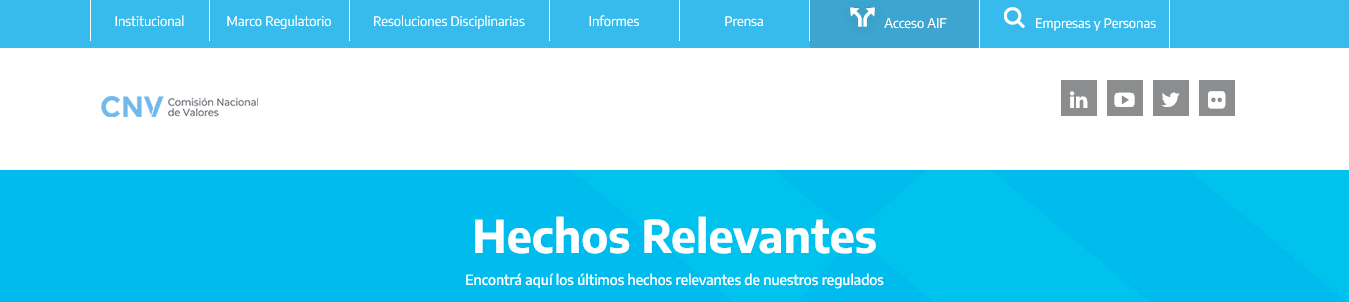

## **Autor**:
Omar Fernández

## **Fuente de datos:**

https://www.cnv.gov.ar/SitioWeb/HechosRelevantes

https://open.bymadata.com.ar/#/issuers-negociable-securities-information

## **Librerías necesarias**

In [7]:
!pip install pdfplumber

In [8]:
!pip install tabula-py

In [9]:
!pip install PyPDF2

In [10]:
import pandas as pd
import tabula

import glob
import os



---
LECTURA DE TABLAS DE UN ARCHIVO ESTRUCTURADO PDF


---



## Origen de los archivos

In [47]:
# Get the current working directory
cwd = os.getcwd()

# Change directory to content
os.chdir(cwd)

# Find all pdf files in the directory
pdf_files = glob.glob("*.pdf")

# Print the list of pdf files
print(pdf_files)


['449879.pdf']


# Esto puede funcionar

In [49]:
for pdf_file in pdf_files:
    pdf_path = os.path.join(cwd, pdf_file)
    print(pdf_path)

/content/449879.pdf


In [16]:
# Extraer las tablas del archivo PDF
tablas = tabula.read_pdf(pdf_path,
                         pages= 1,
                         lattice=True,
                         multiple_tables=True)

# Mostrar las tablas extraídas
for tabla in tablas:
    print(tabla)

Empty DataFrame
Columns: [ANUNCIO DE DIVIDENDO]
Index: []


### Sin líneas visibles

In [23]:
pdf_path = "/content/449879.pdf"

In [24]:
# Extraer las tablas del archivo PDF
tablas = tabula.read_pdf(pdf_path,
                         pages= 1,
                         lattice=False,
                         multiple_tables=False)

# Mostrar las tablas extraídas
for tabla in tablas:
    print(tabla)

In [ ]:
tablas[0]

In [18]:
# Emisora
tablas[0].fillna(0, inplace=True)
tablas[0]

,ANUNCIO DE DIVIDENDO


In [ ]:
# Período
tablas[1]

In [ ]:
# Resultados del Período
tablas[2].fillna(0, inplace=True)
tablas[2]

In [ ]:
# Patrimonio Neto
tablas[3].fillna(0, inplace=True)
tablas[3]



---



---



In [25]:
import pdfplumber

# no obtiene la primera tabla cabecera
pdf = pdfplumber.open(pdf_path)
page = pdf.pages[0]
page.extract_table()



---



---



## Leer dividendos cedears

In [51]:
pdf_path = "/content/449879.pdf"

In [66]:
# Define a function to extract data from the text lines
def extract_data_from_lines(lines):
    data = {}
    for line in lines:
        if "Especie:" in line:
            data['Especie'] = line.split(":")[1].strip()
        elif "Código Caja de Valores:" in line:
            data['Código Caja de Valores'] = line.split(":")[1].strip()
        elif "Fecha de Registro:" in line:
            data['Fecha de Registro'] = line.split(":")[1].strip()
        elif "Fecha de Pago:" in line:
            data['Fecha de Pago'] = line.split(":")[1].strip()
        elif "CUSIP" in line:
            data['CUSIP'] = line.split(":")[1].strip()
        elif "ISIN:" in line:
            data['ISIN'] = line.split(":")[1].strip()
        elif "Ratio a pagar por valor subyacente:" in line:
            data['Ratio a pagar por valor subyacente'] = line.split(":")[1].strip()
        elif "Ratio a pagar por CEDEARs (Imp.Neto):" in line:
            data['Ratio a pagar por CEDEARs (Imp.Neto)'] = line.split(":")[1].strip()
        elif "Retención Impositiva (30%):" in line:
            data['Retención Impositiva (30%)'] = line.split(":")[1].strip()
        elif "Comisión" in line and "IVA:" not in line:
            data['Comisión'] = line.split(":")[1].strip()
        elif "IVA:" in line:
            data['IVA'] = line.split(":")[1].strip()
        elif "Ratio a pagar por Cedears (Imp.Bruto):" in line:
            data['Ratio a pagar por Cedears (Imp.Bruto)'] = line.split(":")[1].strip()
        elif "Ratio (Cedear/Valor Subyacente):" in line:
            data['Ratio (Cedear/Valor Subyacente)'] = line.split(":")[1].strip()
        elif "Nro. de CEDEAR emitidos al Día de Registro:" in line:
            data['Nro. de CEDEAR emitidos al Día de Registro'] = line.split(":")[1].strip()
        elif "Total a pagar en USD (Ratio x CEDEAR emitidos):" in line:
            data['Total a pagar en USD (Ratio x CEDEAR emitidos)'] = line.split(":")[1].strip()
    return data

In [67]:
# Initialize an empty DataFrame
df_dividendos = pd.DataFrame()

try:
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[0]  # Extract the first page
        text = page.extract_text()  # Extract text from the page

        # Split the text into lines
        lines = text.split('\n')
        #print(lines)

        # Extract relevant data from lines
        #data = extract_data_from_lines(lines)
        #print(data)

        # Convert the dictionary to a DataFrame
        #df_dividendos = pd.DataFrame([data])

except Exception as e:
    print(f"An error occurred: {e}")

print(df_dividendos)

Empty DataFrame
Columns: []
Index: []


In [73]:
# Define a function to extract data from the text lines
def extract_data_from_lines_cnv(lines):
    data = {}
    for line in lines:
      print(line)
      print('--'*50)

In [74]:
page = pdf.pages[0]  # Extract the first page
text = page.extract_text()  # Extract text from the page

# Split the text into lines
lines = text.split('\n')
extract_data_from_lines_cnv(lines)

C.A.B.A., 16 de mayo de 2024
----------------------------------------------------------------------------------------------------
Bolsa de Comercio de Buenos Aires
----------------------------------------------------------------------------------------------------
Gerencia Técnica y de Valores Negociables
----------------------------------------------------------------------------------------------------
Comisión Nacional de Valores
----------------------------------------------------------------------------------------------------
Gerencia de Emisoras
----------------------------------------------------------------------------------------------------
ANUNCIO DE DIVIDENDO
----------------------------------------------------------------------------------------------------
Mediante la presente cumplimos en informar que el emisor de los siguientes títulos
----------------------------------------------------------------------------------------------------
subyacentes de CEDEAR ha anunciado

In [70]:
data = extract_data_from_lines(lines)
print(data)

IndexError: list index out of range